In [121]:
%matplotlib widget

In [124]:
import wave
import numpy as np

# Replace 'your_file_path.wav' with the path to your WAV file
file_path = 'D:\Recordings_All\PoolTests\Audio_fs_44100_Chans_4_1704206629_2000.wav'
 
# Separate channels into individual arrays
channel_data = []
sample_rate = -1
num_channels= -1

# Open the WAV file
with wave.open(file_path, 'rb') as wav_file:
    num_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    num_frames = wav_file.getnframes()
    frame_rate = wav_file.getframerate()
    sample_rate = wav_file.getframerate()

    # Read audio frames from the WAV file
    frames = wav_file.readframes(num_frames)

    # Convert the binary data to a NumPy array
    audio_data = np.frombuffer(frames, dtype=np.int16)
   
    for i in range(num_channels):
        channel = audio_data[i::num_channels]
        channel_data.append(channel)


print("Channel count (n): " + str(num_channels))
print("Sample rate (Hz): " + str(sample_rate))
print("Recording length (s): " + str(len(channel_data[0])* 1/sample_rate))

Channel count (n): 4
Sample rate (Hz): 44100
Recording length (s): 30.00018140589569


### Time and Freq Plot

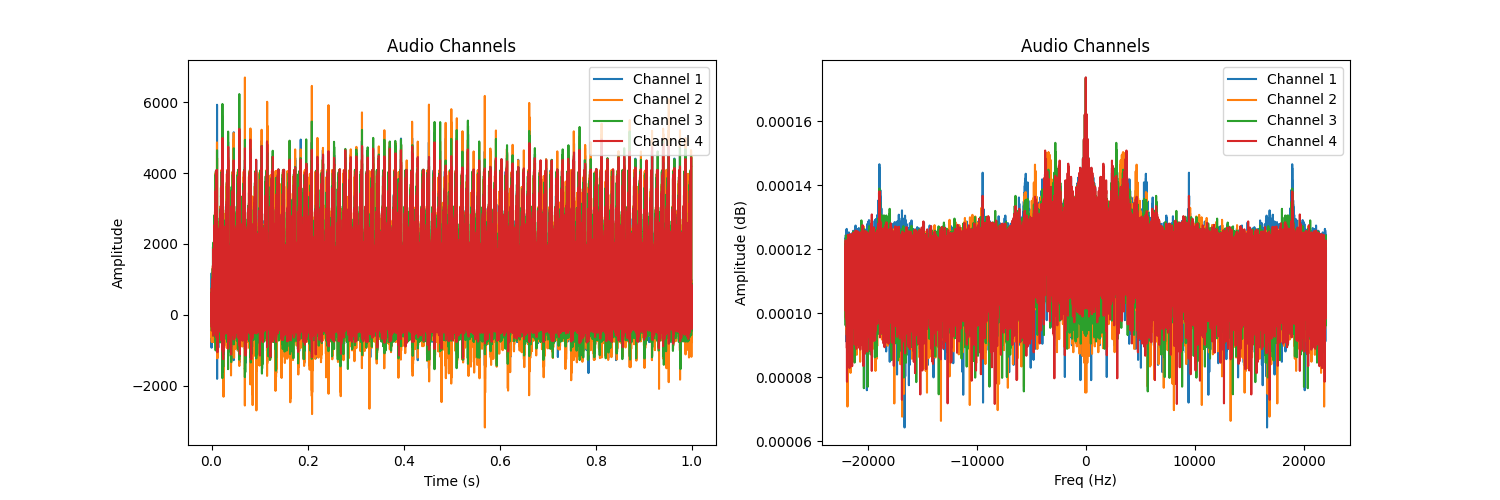

In [133]:
import matplotlib.pyplot as plt

# Plot each channel
period_to_plot = 1; # seconds
sample_count = int(period_to_plot*sample_rate)

# Turn on interactive mode
if True:

    plt.ion()
    # Create a figure and plot each channel

    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    time_axis = np.linspace(0,1,sample_count)

    for i, channel in enumerate(channel_data):
        ax[0].plot(time_axis, channel[:sample_count], label=f'Channel {i + 1}')

    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Audio Channels')
    ax[0].legend()

    for i, channel in enumerate(channel_data):
        fft_data_db = np.log10(np.abs(np.fft.fftshift(np.fft.fft(channel[:sample_count]))))/sample_count
        freq_axis = np.linspace(0,sample_count,sample_count)* (sample_rate/sample_count) - sample_rate/2
        ax[1].plot(freq_axis, fft_data_db, label=f'Channel {i + 1}')

    ax[1].set_xlabel('Freq (Hz)')
    ax[1].ticklabel_format(useOffset=False)
    ax[1].set_ylabel('Amplitude (dB)')
    ax[1].set_title('Audio Channels')
    ax[1].legend()

    plt.show()


### Spectrogram Plot

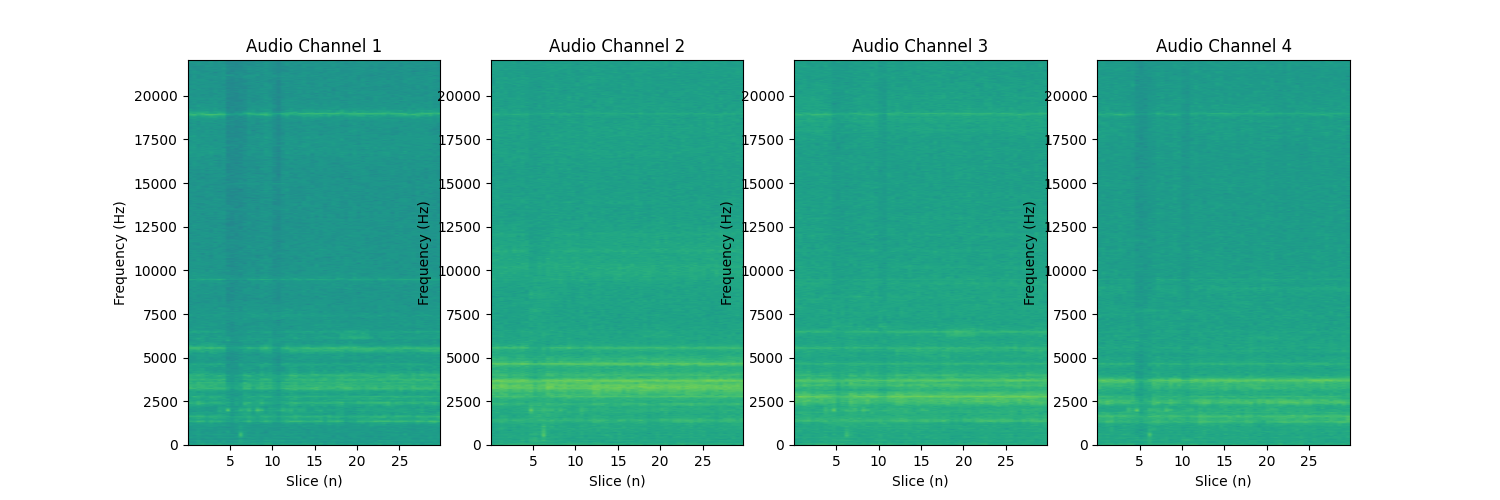

In [135]:
if True:
    
    plt.ion()
    fig, ax = plt.subplots(1,num_channels, figsize=(15, 5))

    for i, channel in enumerate(channel_data):
        ax[i].specgram(channel,Fs=sample_rate,NFFT=22050)
        ax[i].set_ylabel('Frequency (Hz)')
        ax[i].set_xlabel('Slice (n)')
        ax[i].set_title(f'Audio Channel {i + 1}')

    plt.show()